<a href="https://colab.research.google.com/github/LimGuenTaek/pymldg-rev/blob/main/02_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C%20%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2_2_Titanic_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 67 Apr  4 06:34 kaggle.json


In [2]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.97MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 20.5MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('NULL 데이터 갯수 : {}'.format(titanic_df.isnull().sum().sum()))

NULL 데이터 갯수 : 0


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Feature 중 Sex , Cabin , Embarked의 값 분류를 살펴보겠습니다.

In [12]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C90              1
C128             1
A6               1
B38              1
E40              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Sex ,Embarked 값은 별문제가 없지만 , Cabin 값의 경우 대다수가 'N'을 가지고 있습니다.

* 'N'이 687건으로 가장 많은 것도 특이하지만 , 속성값이 제대로 정리가 되지 않은 것 같습니다.

* Cabin의 경우 선실등급을 나타내는 앞의 알파벳이 중요해보이기 때문에 앞 문자만 추출하도록 해줍니다.


In [30]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1] ## .str 메소드가 있나봄

In [15]:
titanic_df['Cabin'].head(10)

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object

* 머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색해보면

* 첫번째로 어떤 유형의 승객이 생존 확률이 높았는지 확인해보겠습니다.

* 보통 사고가 나면 , 여성과 아이들 노약자가 1순위 구조 대상입니다.

* 그 다음으로는 부자나 유명인들이 될 것이고

* 마지막으로는 돈이 없는 가난한 삼등실에 탄 남성들이 마지막 순위 였을 것 입니다.

* 우선 , 성별에 따른 생존자 수를 비교해보겠습니다.

In [16]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

* groupby를 이용해 확인해보면 알 수 있듯이 여성이 남성보다는 생존확률이 훨씬 높은 것을 알 수 있습니다.

* Seaborn 패키지를 이용해 시각화를 하면서 확인해보겠습니다.

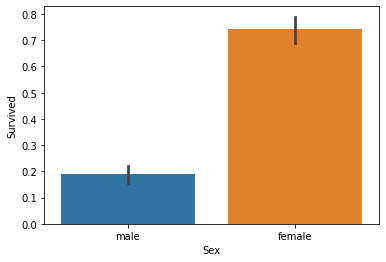

In [17]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

* 부자와 가난한 사람 간의 생존확률을 비교해보겠습니다.

* 단순히 Pclass 와 Survived 보다는 성별을 추가해 비교해보겠습니다.

* hue 파라미터를 추가해 hue = 'Sex'와 같이 입력하면 간단하게 할 수 있습니다.

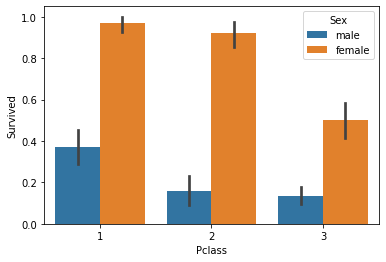

In [19]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

* 이번에는 Age에 따른 생존확률을 알아보겠습니다.

* Age의 경우 값 종류가 많기 때문에 범위별로 카테고리 값을 할당하겠습니다.

In [20]:
def get_category(age):
  category=''
  if age <= -1 : category='Unknown'
  elif age <=5 : category='Baby'
  elif age <=12 : category='Child'
  elif age <=18 : category='Teenager'
  elif age <=25 : category='Student'
  elif age <=35 : category='Young_Adult'
  elif age <=60 : category='Adult'
  else : category='Elderly'

  return category

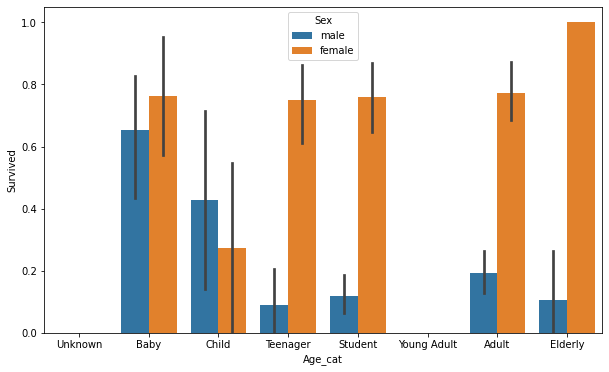

In [21]:
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* 지금까지 확인 해본 결과 Sex , Age , Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느 정도 확인할 수 있었습니다.

* 이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하겠습니다.

In [33]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features=['Sex','Embarked','Cabin']
  for feature in features:
    encoder=LabelEncoder()
    encoder.fit(dataDF[feature])
    dataDF[feature]=encoder.transform(dataDF[feature])
  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df[['Sex','Cabin','Embarked']].head(5)

,Sex,Cabin,Embarked
0,1,7,3
1,0,2,0
2,0,7,3
3,0,2,3
4,1,7,3


* 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용 할 수 있도록 만들어보겠습니다.

In [34]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [49]:
train_data=pd.read_csv('train.csv')

train_label=train_data['Survived']
train_feature=train_data.drop('Survived',axis=1)
train_feature=transform_features(train_feature)

test_data=pd.read_csv('test.csv')

test_feature=transform_features(test_data)

print(train_label.shape)
print(train_feature.shape)
print(test_feature.shape)

(891,)
(891, 8)
(418, 8)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(train_feature , train_label)
lr_pred = lr_clf.predict(test_feature)

In [54]:
print(len(lr_pred))

418


In [56]:
submission=pd.read_csv('gender_submission.csv')
submission['Survived']=lr_pred
submission.to_csv('submission.csv',index=False)